# Online Sales Data Analysis

<i> Dataset provides a comprehensive overview of online sales transactions across different product categories. Each row represents a single transaction with detailed information such as the order ID, date, category, product name, quantity sold, unit price, total price, region, and payment method.</i>

### Insights to Find from Sales Data Analysis


1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.
2. Explore the popularity of different product categories across regions.
3. Investigate the impact of payment methods on sales volume or revenue.
4. Identify top-selling products within each category to optimize inventory and marketing strategies.
5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

### Importing necessary Libraries

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [124]:
data = pd.read_csv("Online Sales Data.csv")

In [125]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


#### Dataset Overview:
Columns:
- Order ID: Unique identifier for each sales order.
- Date:Date of the sales transaction.
- Category:Broad category of the product sold (e.g., Electronics, Home Appliances, Clothing, Books, Beauty Products, Sports).
- Product Name:Specific name or model of the product sold.
- Quantity:Number of units of the product sold in the transaction.
- Unit Price:Price of one unit of the product.
- Total Price: Total revenue generated from the sales transaction (Quantity * Unit Price).
- Region:Geographic region where the transaction occurred (e.g., North America, Europe, Asia).
- Payment Method: Method used for payment (e.g., Credit Card, PayPal, Debit Card).

### Data Exploration

In [126]:
print("Dataset is about {} rows and {} columns .".format(data.shape[0],data.shape[1]))

Dataset is about 240 rows and 9 columns .


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [128]:
data.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [129]:
data.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [130]:
data.duplicated().sum()

np.int64(0)

In [131]:
data.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


Dataset contains 0 null values and there is no duplicated rows

### Data Cleaning and Data Extraction

In [132]:
data["Date"] = pd.to_datetime(data["Date"])

In [133]:
data["Year"] = data["Date"].dt.year

In [134]:
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month

In [135]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Day,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,2,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,3,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,4,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,5,1


## 1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.

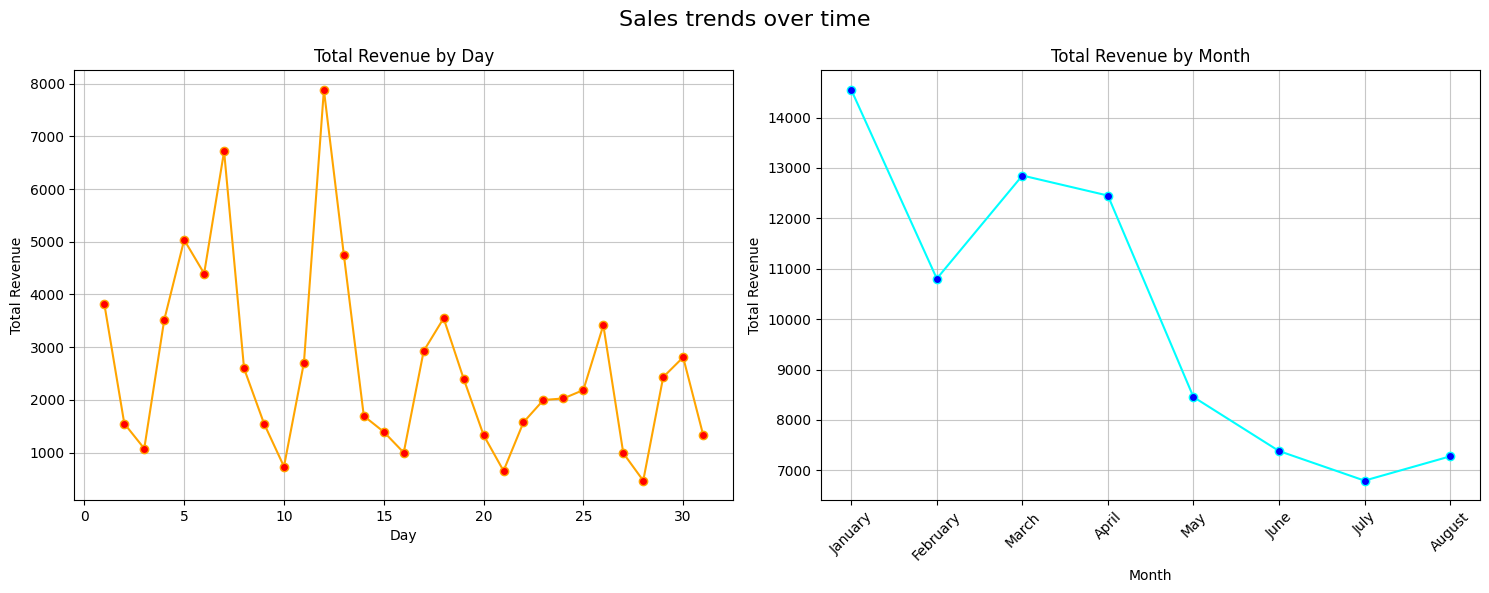

In [136]:
import calendar
by_day_revenue = data.groupby('Day')["Total Revenue"].sum()
plt.figure(figsize=(15, 6))
plt.suptitle('Sales trends over time',fontsize=16)
plt.subplot(1, 2, 1)
by_day_revenue.plot(kind='line', marker='o', color='orange', markerfacecolor='red')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day')
plt.grid(True, alpha=0.7)
plt.tight_layout()


plt.subplot(1, 2, 2)
mon_names = [calendar.month_name[i] for i in range(1, 9)]
by_month_revenue = data.groupby('Month')["Total Revenue"].sum()
by_month_revenue.plot(kind='line', marker='o', color='cyan', markerfacecolor='blue')
plt.xticks(range(1, 9), mon_names, rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.grid(True, alpha=0.7)
plt.tight_layout()

plt.show()

### Observations from the Revenue by Day Graph

- **Trend**: Revenue increases towards the end of the first week.
- **Fluctuations**: There's a decrease during the second week.
- **Peak**: Notable peak around the 12th or 13th day.
- **Pattern**: After the peak, a pattern of increases and decreases is observed towards the month's end.

This suggests mid-month sales boosts and a need for strategic planning to maintain revenue stability.

### Analysis of Total Revenue Trends by Month

- **Decline**: There is a noticeable decline in revenue observed from January to February.
- **Increase**: Subsequently, revenue shows a significant increase between February and April.
- **Continued Decline**: However, revenue trends downward following the peak in April.

These trends suggest potential seasonal variations or shifts in market conditions, highlighting the importance of adaptive revenue management strategies.


## 2. Explore the popularity of different product categories across regions.

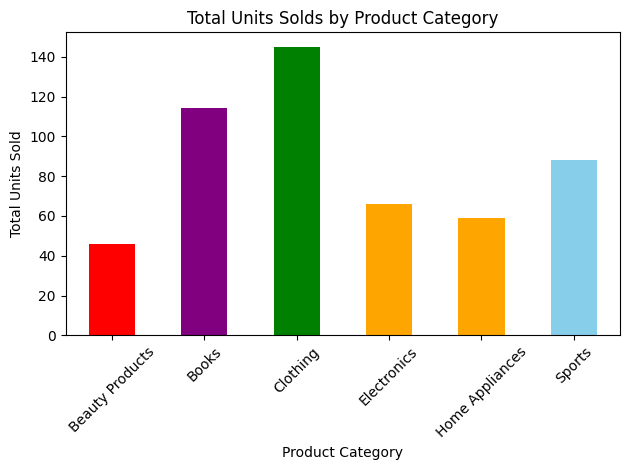

In [137]:
prod_cat = data.groupby("Product Category")["Units Sold"].sum()
prod_cat.plot(kind = "bar",color = ["red","purple","green","orange","orange","skyblue"])
plt.ylabel('Total Units Sold')
plt.title('Total Units Solds by Product Category')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [138]:
print(prod_cat)

Product Category
Beauty Products     46
Books              114
Clothing           145
Electronics         66
Home Appliances     59
Sports              88
Name: Units Sold, dtype: int64


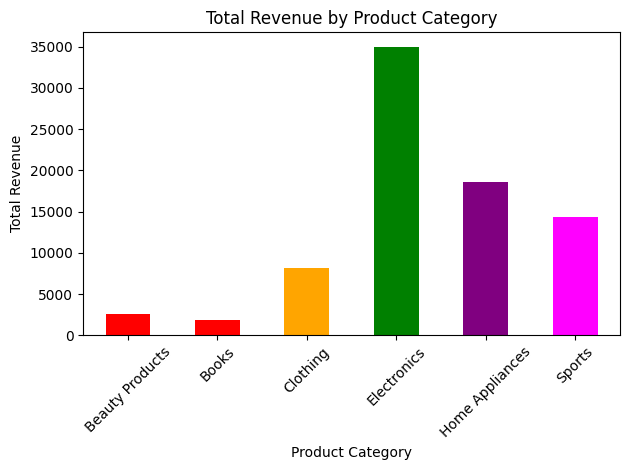

In [139]:
prod_cat = data.groupby("Product Category")["Total Revenue"].sum()
prod_cat.plot(kind = "bar",color = ["red","red","orange","green","purple","magenta"])
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Observations from Total Revenue by Product Category

- **Electronics**, **Home Appliances**, and **Sports** categories show significantly higher revenue compared to **Beauty Products** and **Books**.
- **Electronics** and **Home Appliances** appear to be the top revenue-generating categories, followed by **Sports**.
- **Beauty Products** and **Books** contribute comparatively less to total revenue.

These observations suggest potential areas for strategic focus, such as optimizing marketing strategies or inventory management for high-revenue categories.


In [140]:
data["Region"].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

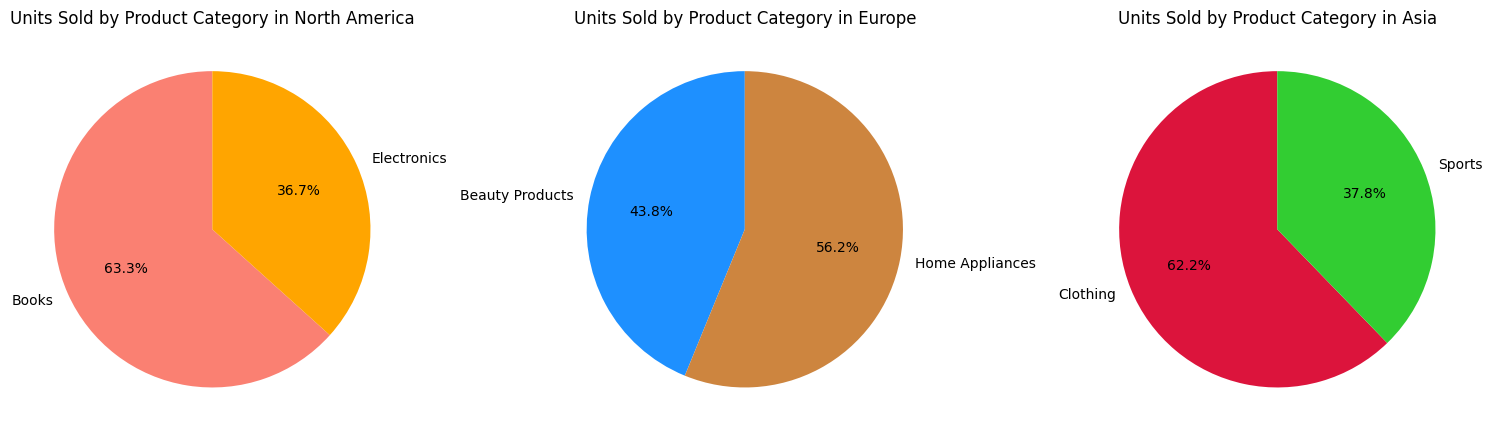

In [141]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
reg = data.groupby([data["Region"]=="North America","Product Category"])["Units Sold"].sum()[True]
reg.plot(kind = "pie",autopct='%1.1f%%', startangle=90,colors=["salmon","orange"])
plt.title('Units Sold by Product Category in North America')
plt.ylabel('')
plt.tight_layout()


plt.subplot(1,3,2)
reg = data.groupby([data["Region"]=="Europe","Product Category"])["Units Sold"].sum()[True]
reg.plot(kind = "pie",autopct='%1.1f%%', startangle=90,colors=["dodgerblue","peru"])
plt.title('Units Sold by Product Category in Europe')
plt.ylabel('')
plt.tight_layout()


plt.subplot(1,3,3)
reg = data.groupby([data["Region"]=="Asia","Product Category"])["Units Sold"].sum()[True]
reg.plot(kind = "pie",autopct='%1.1f%%', startangle=90,colors=["crimson","limegreen"])
plt.ylabel('')
plt.title('Units Sold by Product Category in Asia')
plt.tight_layout()
plt.show()

### Observation from Units Sold by Product Category in North America

- **Books**: Represent 63% of total units sold in North America.
- **Electronics**: Account for 36% of total units sold in North America.

This indicates that Books are the most popular product category in North America, followed by Electronics.
### Observation from Units Sold by Product Category in Europe

- **Beauty Products**: Represent 43% of total units sold in Europe.
- **Home Applicances**: Account for 56% of total units sold in Europe.

This indicates that Home Applicances are the most popular product category in Europe, followed by Beauty Products.
### Observation from Units Sold by Product Category in Asia

- **Clothing**: Represent 62% of total units sold in Asia.
- **Sports**: Account for 37% of total units sold in Asia.

This indicates that Clothing are the most popular product category in Asia, followed by Sports.

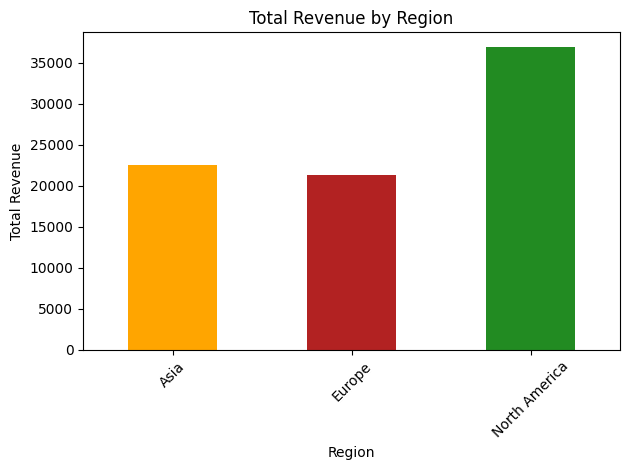

In [142]:
reg_revenue = data.groupby("Region")["Total Revenue"].sum()
reg_revenue.plot(kind = "bar",color = ["orange","firebrick","forestgreen"])
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Observation from Total Revenue by Region

- **North America**: Shows the highest total revenue among all regions.
- **Europe** and **Asia**: Have relatively lower total revenues compared to North America.

This indicates that North America contributes the most to total revenue, suggesting it is a significant market for the products sold.


## 3. Investigate the impact of payment methods on sales volume or revenue.

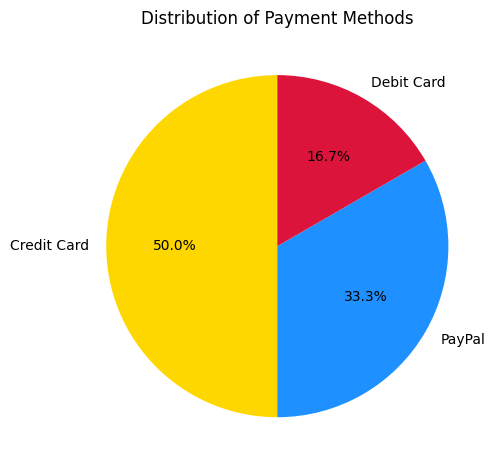

In [143]:
payment_methods = data["Payment Method"].value_counts()
payment_methods.plot(kind='pie', autopct='%1.1f%%', startangle=90,colors=["gold","dodgerblue","crimson"])
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.tight_layout()
plt.show()

- Most of the Payment methods are done through Credit Card about 50%.

## 4. Identify top-selling products within each category to optimize inventory and marketing strategies.

In [144]:
top_selling_prod = data.groupby('Product Category').apply(lambda x : x.sort_values(by = "Units Sold" , ascending = False).head(5))

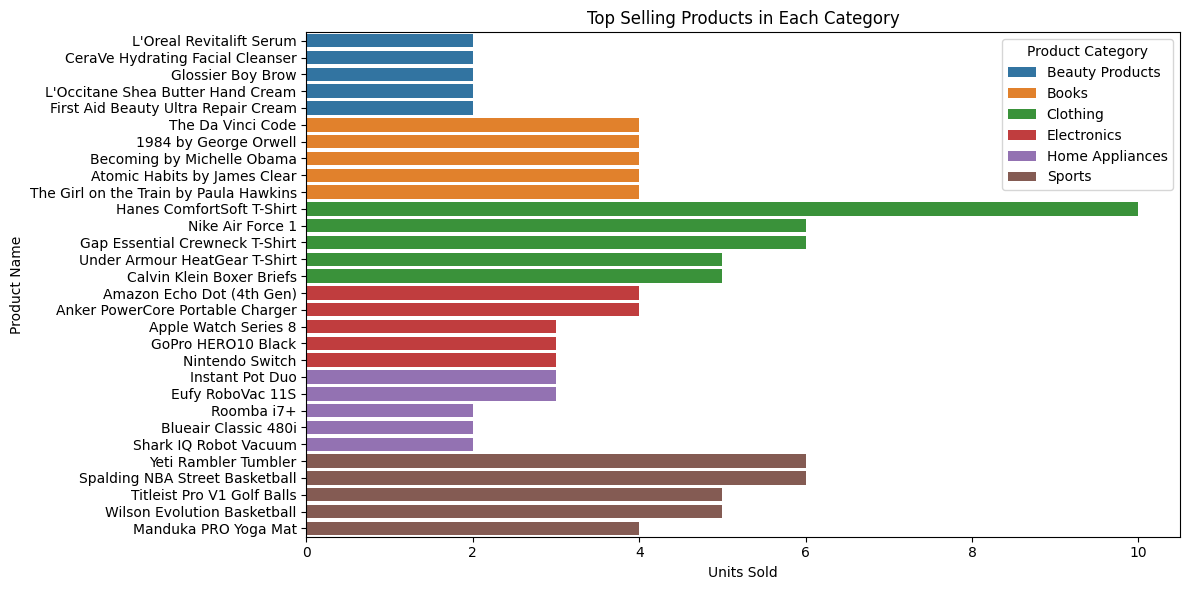

In [145]:
plt.figure(figsize=(12, 6))
sns.barplot( y = 'Product Name' , x = 'Units Sold' , hue = 'Product Category' , data = top_selling_prod)
plt.title("Top Selling Products in Each Category")
plt.xlabel("Units Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

## 5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

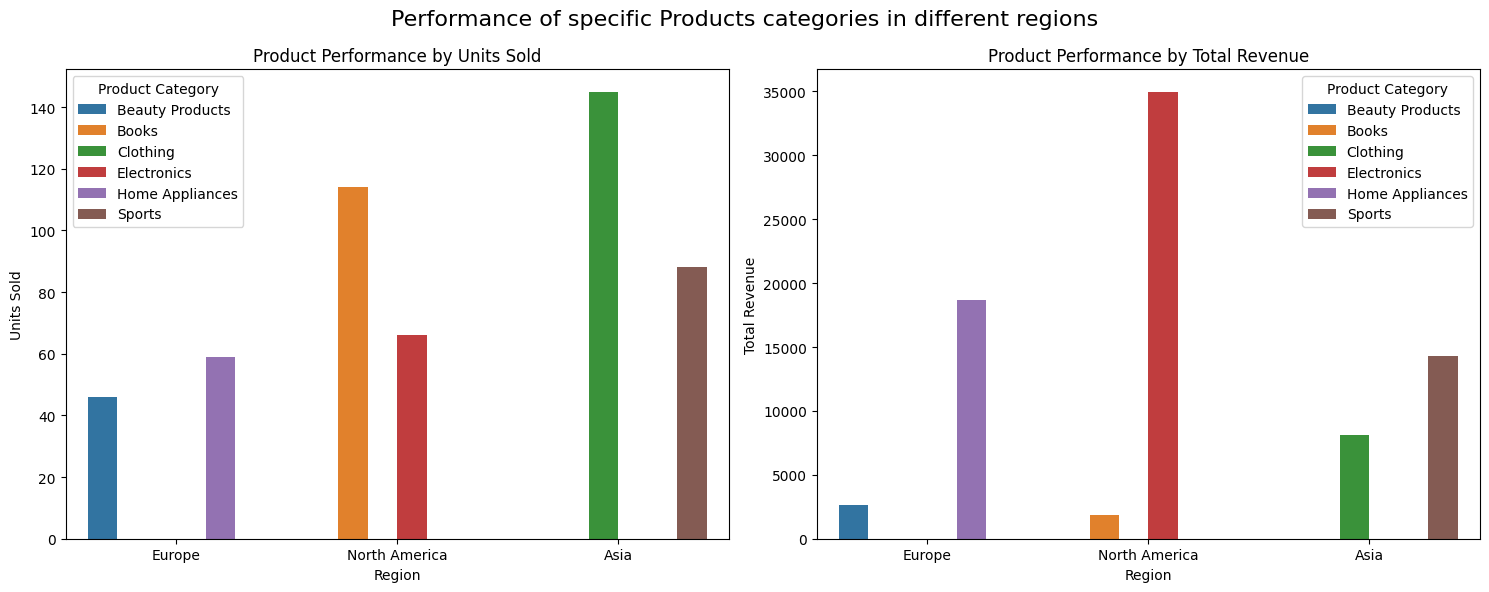

In [146]:
plt.figure(figsize=((15,6)))
plt.suptitle("Performance of specific Products categories in different regions",fontsize=16)
plt.subplot(1,2,1)
prod_performance = data.groupby(['Product Category','Region'])["Units Sold"].sum().reset_index()
sns.barplot(x = 'Region' ,y = "Units Sold" , hue = 'Product Category',data = prod_performance)
plt.title("Product Performance by Units Sold")
plt.tight_layout()

plt.subplot(1,2,2)
prod_performance = data.groupby(['Product Category','Region'])["Total Revenue"].sum().reset_index()
sns.barplot(x = 'Region' ,y = "Total Revenue" , hue = 'Product Category',data = prod_performance)
plt.title("Product Performance by Total Revenue")
plt.tight_layout()
plt.show()

## Acknowledgments

- Kaggle Dataset: [https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data]
- Libraries Used: Pandas, Matplotlib, Seaborn